In [21]:
import datetime
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('cashier_sales_log.csv')
df

,SalesId,salesInvoiceNo,salesInvoice_fk_categoryId,salesDate,salesAmount,cashPayment,posPayment,transferPayment,chequePayment,salesPeriod,paymentStatus,depositedAmount,balanceAmount,salesOption,sales_fk_storeId,addedBy_fk_userId,softDelete,softDeleteReason,softDeleteDate,softDeletedBy_fk_userId
0,132,4363,3,10/27/2020,1200,1200,0,0,0,Morning,Full Payment,0,0,1,1,1014,0,NaN,0000-00-00,0
1,133,4364,3,10/27/2020,100,100,0,0,0,Morning,Full Payment,0,0,0,1,1014,0,NaN,0000-00-00,0
2,134,4365,3,10/27/2020,6900,5000,0,1900,0,Morning,Full Payment,0,0,1,1,1014,0,NaN,0000-00-00,0
3,135,4366,3,10/27/2020,1800,1800,0,0,0,Morning,Full Payment,0,0,1,1,1014,0,NaN,0000-00-00,0
4,136,134858,3,10/27/2020,400,400,0,0,0,Morning,Full Payment,0,0,0,1,1014,0,NaN,0000-00-00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89240,90972,515583,3,11/10/2023,18450,18450,0,0,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0
89241,90973,515584,3,11/10/2023,4000,4000,0,0,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0
89242,90974,515585,3,11/10/2023,2000,2000,0,0,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0
89243,90975,515586,3,11/10/2023,2600,0,0,2600,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0


In [3]:
selected_columns = ['salesDate', 'salesAmount']
df = df[selected_columns]
# Added newly to avoid that copy message error
df = df.copy() 
df

,salesDate,salesAmount
0,10/27/2020,1200
1,10/27/2020,100
2,10/27/2020,6900
3,10/27/2020,1800
4,10/27/2020,400
...,...,...
89240,11/10/2023,18450
89241,11/10/2023,4000
89242,11/10/2023,2000
89243,11/10/2023,2600


In [4]:
# pd.to_datetime(df['salesDate'], dayfirst=True, format='%m-%d-%Y').dt.strftime('%d-%m-%Y')/// previous mistake
df['salesDate'] = pd.to_datetime(df['salesDate'], dayfirst=True)
df.index = df['salesDate']
df

C:\Users\Berlin\AppData\Local\Temp\ipykernel_6300\957688920.py:2: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['salesDate'] = pd.to_datetime(df['salesDate'], dayfirst=True)


,salesDate,salesAmount
salesDate,,
2020-10-27,2020-10-27,1200
2020-10-27,2020-10-27,100
2020-10-27,2020-10-27,6900
2020-10-27,2020-10-27,1800
2020-10-27,2020-10-27,400
...,...,...
2023-10-11,2023-10-11,18450
2023-10-11,2023-10-11,4000
2023-10-11,2023-10-11,2000


In [5]:
# Display the data type and sample values of the 'salesDate' column
print(df['salesDate'].head())
print(df['salesDate'].dtype)

salesDate
2020-10-27   2020-10-27
2020-10-27   2020-10-27
2020-10-27   2020-10-27
2020-10-27   2020-10-27
2020-10-27   2020-10-27
Name: salesDate, dtype: datetime64[ns]
datetime64[ns]


In [6]:
df['Year'] = df['salesDate'].dt.year
df['Month'] = df['salesDate'].dt.month
###################
df_monthly = df.groupby(['Year', 'Month'])['salesAmount'].sum().reset_index()
###################
# df_monthly = df_monthly.set_index('Month')
df_monthly


,Year,Month,salesAmount
0,2020,1,1239886
1,2020,2,1214255
2,2020,3,1934471
3,2020,4,2599769
4,2020,5,2048658
5,2020,6,634869
6,2020,7,1751055
7,2020,8,1093905
8,2020,9,1624232
9,2020,10,4404669


<Axes: >

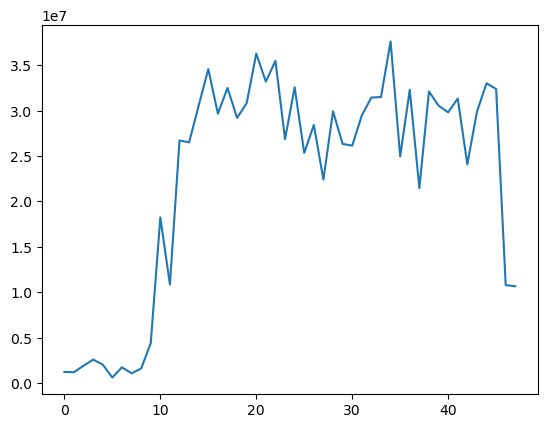

In [7]:
revenue = df_monthly['salesAmount']
revenue.plot()

In [8]:
revenue = np.array(revenue).reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(revenue)

In [16]:
def df_to_X_y(df, window_size=3):
    df_as_np = df
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [50]:
WINDOW_SIZE = 4
X, y = df_to_X_y(scaled_data, WINDOW_SIZE)
X.shape, y.shape

((44, 4, 1, 1), (44, 1))

In [51]:
X

array([[[[0.01636972]],

        [[0.01567623]],

        [[0.03516285]],

        [[0.05316357]]],


       [[[0.01567623]],

        [[0.03516285]],

        [[0.05316357]],

        [[0.03825236]]],


       [[[0.03516285]],

        [[0.05316357]],

        [[0.03825236]],

        [[0.        ]]],


       [[[0.05316357]],

        [[0.03825236]],

        [[0.        ]],

        [[0.03020023]]],


       [[[0.03825236]],

        [[0.        ]],

        [[0.03020023]],

        [[0.01241997]]],


       [[[0.        ]],

        [[0.03020023]],

        [[0.01241997]],

        [[0.02676883]]],


       [[[0.03020023]],

        [[0.01241997]],

        [[0.02676883]],

        [[0.10199807]]],


       [[[0.01241997]],

        [[0.02676883]],

        [[0.10199807]],

        [[0.47631403]]],


       [[[0.02676883]],

        [[0.10199807]],

        [[0.47631403]],

        [[0.27667287]]],


       [[[0.10199807]],

        [[0.47631403]],

        [[0.27667287]],

       

In [52]:
y

array([[0.03825236],
       [0.        ],
       [0.03020023],
       [0.01241997],
       [0.02676883],
       [0.10199807],
       [0.47631403],
       [0.27667287],
       [0.70545623],
       [0.69962934],
       [0.80954351],
       [0.91791763],
       [0.78507152],
       [0.86186058],
       [0.77253477],
       [0.81659684],
       [0.9639738 ],
       [0.88043647],
       [0.94238657],
       [0.70936499],
       [0.86369283],
       [0.66841059],
       [0.75157222],
       [0.58902775],
       [0.79227499],
       [0.6952137 ],
       [0.68991442],
       [0.77970778],
       [0.83321843],
       [0.83451428],
       [1.        ],
       [0.65823882],
       [0.8563779 ],
       [0.5635466 ],
       [0.85115957],
       [0.80916636],
       [0.78906691],
       [0.83012196],
       [0.63440526],
       [0.79051017],
       [0.87544208],
       [0.85869152],
       [0.27502358],
       [0.27143563]])

In [128]:
# X_train, y_train = X[:31], y[:31]
# X_val, y_val = X[31:36], y[31:36]
# X_test, y_test = X[36:43], y[36:43]
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [129]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True)

In [130]:
len(X_train)

30

In [131]:
len(X_test)

11

In [132]:
len(y_train)

30

In [133]:
len(y_test)

11

In [134]:
len(y_val)

3

In [135]:
len(X_val)

3

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((WINDOW_SIZE,1)))
model.add(LSTM(64,))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
cp = ModelCheckpoint('Sales Prediction Model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics = [RootMeanSquaredError()])

In [138]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 0.5504 - root_mean_squared_error: 0.7419INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 12s 12s/step - loss: 0.5504 - root_mean_squared_error: 0.7419 - val_loss: 0.4395 - val_root_mean_squared_error: 0.6629
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 0.5181 - root_mean_squared_error: 0.7198INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.5181 - root_mean_squared_error: 0.7198 - val_loss: 0.4143 - val_root_mean_squared_error: 0.6437
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 0.4873 - root_mean_squared_error: 0.6980INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.4873 - root_mean_squared_error: 0.6980 - val_loss: 0.3901 - val_root_mean_squared_error: 0.6246
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.4576 - root_mean_squared_error: 0.6764INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.4576 - root_mean_squared_error: 0.6764 - val_loss: 0.3667 - val_root_mean_squared_error: 0.6055
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 0.4291 - root_mean_squared_error: 0.6550INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.4291 - root_mean_squared_error: 0.6550 - val_loss: 0.3441 - val_root_mean_squared_error: 0.5866
Epoch 6/200
1/1 [==============================] - ETA: 0s - loss: 0.4018 - root_mean_squared_error: 0.6339INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.4018 - root_mean_squared_error: 0.6339 - val_loss: 0.3307 - val_root_mean_squared_error: 0.5751
Epoch 7/200
1/1 [==============================] - ETA: 0s - loss: 0.3847 - root_mean_squared_error: 0.6202INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.3847 - root_mean_squared_error: 0.6202 - val_loss: 0.3203 - val_root_mean_squared_error: 0.5659
Epoch 8/200
1/1 [==============================] - ETA: 0s - loss: 0.3720 - root_mean_squared_error: 0.6099INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.3720 - root_mean_squared_error: 0.6099 - val_loss: 0.3097 - val_root_mean_squared_error: 0.5565
Epoch 9/200
1/1 [==============================] - ETA: 0s - loss: 0.3591 - root_mean_squared_error: 0.5993INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.3591 - root_mean_squared_error: 0.5993 - val_loss: 0.2990 - val_root_mean_squared_error: 0.5468
Epoch 10/200
1/1 [==============================] - ETA: 0s - loss: 0.3462 - root_mean_squared_error: 0.5884INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.3462 - root_mean_squared_error: 0.5884 - val_loss: 0.2882 - val_root_mean_squared_error: 0.5368
Epoch 11/200
1/1 [==============================] - ETA: 0s - loss: 0.3331 - root_mean_squared_error: 0.5772INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.3331 - root_mean_squared_error: 0.5772 - val_loss: 0.2774 - val_root_mean_squared_error: 0.5267
Epoch 12/200
1/1 [==============================] - ETA: 0s - loss: 0.3201 - root_mean_squared_error: 0.5657INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.3201 - root_mean_squared_error: 0.5657 - val_loss: 0.2665 - val_root_mean_squared_error: 0.5162
Epoch 13/200
1/1 [==============================] - ETA: 0s - loss: 0.3069 - root_mean_squared_error: 0.5540INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 0.3069 - root_mean_squared_error: 0.5540 - val_loss: 0.2555 - val_root_mean_squared_error: 0.5055
Epoch 14/200
1/1 [==============================] - ETA: 0s - loss: 0.2937 - root_mean_squared_error: 0.5419INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.2937 - root_mean_squared_error: 0.5419 - val_loss: 0.2445 - val_root_mean_squared_error: 0.4945
Epoch 15/200
1/1 [==============================] - ETA: 0s - loss: 0.2804 - root_mean_squared_error: 0.5296INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.2804 - root_mean_squared_error: 0.5296 - val_loss: 0.2335 - val_root_mean_squared_error: 0.4832
Epoch 16/200
1/1 [==============================] - ETA: 0s - loss: 0.2671 - root_mean_squared_error: 0.5168INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.2671 - root_mean_squared_error: 0.5168 - val_loss: 0.2224 - val_root_mean_squared_error: 0.4715
Epoch 17/200
1/1 [==============================] - ETA: 0s - loss: 0.2538 - root_mean_squared_error: 0.5038INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.2538 - root_mean_squared_error: 0.5038 - val_loss: 0.2112 - val_root_mean_squared_error: 0.4595
Epoch 18/200
1/1 [==============================] - ETA: 0s - loss: 0.2404 - root_mean_squared_error: 0.4903INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.2404 - root_mean_squared_error: 0.4903 - val_loss: 0.2000 - val_root_mean_squared_error: 0.4472
Epoch 19/200
1/1 [==============================] - ETA: 0s - loss: 0.2270 - root_mean_squared_error: 0.4764INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.2270 - root_mean_squared_error: 0.4764 - val_loss: 0.1887 - val_root_mean_squared_error: 0.4344
Epoch 20/200
1/1 [==============================] - ETA: 0s - loss: 0.2136 - root_mean_squared_error: 0.4621INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.2136 - root_mean_squared_error: 0.4621 - val_loss: 0.1774 - val_root_mean_squared_error: 0.4212
Epoch 21/200
1/1 [==============================] - ETA: 0s - loss: 0.2002 - root_mean_squared_error: 0.4474INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.2002 - root_mean_squared_error: 0.4474 - val_loss: 0.1662 - val_root_mean_squared_error: 0.4076
Epoch 22/200
1/1 [==============================] - ETA: 0s - loss: 0.1868 - root_mean_squared_error: 0.4322INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.1868 - root_mean_squared_error: 0.4322 - val_loss: 0.1549 - val_root_mean_squared_error: 0.3936
Epoch 23/200
1/1 [==============================] - ETA: 0s - loss: 0.1736 - root_mean_squared_error: 0.4166INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.1736 - root_mean_squared_error: 0.4166 - val_loss: 0.1437 - val_root_mean_squared_error: 0.3791
Epoch 24/200
1/1 [==============================] - ETA: 0s - loss: 0.1604 - root_mean_squared_error: 0.4005INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.1604 - root_mean_squared_error: 0.4005 - val_loss: 0.1326 - val_root_mean_squared_error: 0.3642
Epoch 25/200
1/1 [==============================] - ETA: 0s - loss: 0.1475 - root_mean_squared_error: 0.3840INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.1475 - root_mean_squared_error: 0.3840 - val_loss: 0.1217 - val_root_mean_squared_error: 0.3488
Epoch 26/200
1/1 [==============================] - ETA: 0s - loss: 0.1347 - root_mean_squared_error: 0.3671INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.1347 - root_mean_squared_error: 0.3671 - val_loss: 0.1109 - val_root_mean_squared_error: 0.3330
Epoch 27/200
1/1 [==============================] - ETA: 0s - loss: 0.1223 - root_mean_squared_error: 0.3497INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.1223 - root_mean_squared_error: 0.3497 - val_loss: 0.1003 - val_root_mean_squared_error: 0.3168
Epoch 28/200
1/1 [==============================] - ETA: 0s - loss: 0.1102 - root_mean_squared_error: 0.3320INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.1102 - root_mean_squared_error: 0.3320 - val_loss: 0.0901 - val_root_mean_squared_error: 0.3002
Epoch 29/200
1/1 [==============================] - ETA: 0s - loss: 0.0987 - root_mean_squared_error: 0.3141INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0987 - root_mean_squared_error: 0.3141 - val_loss: 0.0803 - val_root_mean_squared_error: 0.2834
Epoch 30/200
1/1 [==============================] - ETA: 0s - loss: 0.0877 - root_mean_squared_error: 0.2962INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0877 - root_mean_squared_error: 0.2962 - val_loss: 0.0710 - val_root_mean_squared_error: 0.2665
Epoch 31/200
1/1 [==============================] - ETA: 0s - loss: 0.0775 - root_mean_squared_error: 0.2785INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0775 - root_mean_squared_error: 0.2785 - val_loss: 0.0623 - val_root_mean_squared_error: 0.2496
Epoch 32/200
1/1 [==============================] - ETA: 0s - loss: 0.0682 - root_mean_squared_error: 0.2612INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0682 - root_mean_squared_error: 0.2612 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2330
Epoch 33/200
1/1 [==============================] - ETA: 0s - loss: 0.0599 - root_mean_squared_error: 0.2447INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0599 - root_mean_squared_error: 0.2447 - val_loss: 0.0471 - val_root_mean_squared_error: 0.2169
Epoch 34/200
1/1 [==============================] - ETA: 0s - loss: 0.0527 - root_mean_squared_error: 0.2296INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0527 - root_mean_squared_error: 0.2296 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2019
Epoch 35/200
1/1 [==============================] - ETA: 0s - loss: 0.0469 - root_mean_squared_error: 0.2165INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0469 - root_mean_squared_error: 0.2165 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1883
Epoch 36/200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - root_mean_squared_error: 0.2059INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0424 - root_mean_squared_error: 0.2059 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1767
Epoch 37/200
1/1 [==============================] - ETA: 0s - loss: 0.0394 - root_mean_squared_error: 0.1984INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0394 - root_mean_squared_error: 0.1984 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 38/200
1/1 [==============================] - ETA: 0s - loss: 0.0378 - root_mean_squared_error: 0.1945INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0378 - root_mean_squared_error: 0.1945 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 39/200
1/1 [==============================] - ETA: 0s - loss: 0.0376 - root_mean_squared_error: 0.1940INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0376 - root_mean_squared_error: 0.1940 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1578
Epoch 40/200
1/1 [==============================] - ETA: 0s - loss: 0.0386 - root_mean_squared_error: 0.1964INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0386 - root_mean_squared_error: 0.1964 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 41/200
1/1 [==============================] - 0s 100ms/step - loss: 0.0403 - root_mean_squared_error: 0.2007 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575
Epoch 42/200
1/1 [==============================] - 0s 110ms/step - loss: 0.0424 - root_mean_squared_error: 0.2059 - val_loss: 0.0252 - val_root_mean_squared_error: 0.1588
Epoch 43/200
1/1 [==============================] - 0s 101ms/step - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 44/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0460 - root_mean_squared_error: 0.2144 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1609
Epoch 45/200
1/1 [==============================] - 0s 116ms/step - loss: 0.0469 - root_mean_squared_error: 0.2165 - val_loss: 0.0259 - val_root_mean_squared

INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0438 - root_mean_squared_error: 0.2092 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1561
Epoch 50/200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - root_mean_squared_error: 0.2054INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0422 - root_mean_squared_error: 0.2054 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1551
Epoch 51/200
1/1 [==============================] - ETA: 0s - loss: 0.0406 - root_mean_squared_error: 0.2016INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0406 - root_mean_squared_error: 0.2016 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1549
Epoch 52/200
1/1 [==============================] - 0s 105ms/step - loss: 0.0393 - root_mean_squared_error: 0.1983 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 53/200
1/1 [==============================] - 0s 100ms/step - loss: 0.0383 - root_mean_squared_error: 0.1957 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1564
Epoch 54/200
1/1 [==============================] - 0s 106ms/step - loss: 0.0376 - root_mean_squared_error: 0.1938 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581
Epoch 55/200
1/1 [==============================] - 0s 100ms/step - loss: 0.0372 - root_mean_squared_error: 0.1928 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1601
Epoch 56/200
1/1 [==============================] - 0s 110ms/step - loss: 0.0370 - root_mean_squared_error: 0.1925 - val_loss: 0.0264 - val_root_mean_square

INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1539
Epoch 76/200
1/1 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1913INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 77/200
1/1 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1913INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 78/200
1/1 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1914INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0366 - root_mean_squared_error: 0.1914 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 79/200
1/1 [==============================] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.1915INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0367 - root_mean_squared_error: 0.1915 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1508
Epoch 80/200
1/1 [==============================] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.1915INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0367 - root_mean_squared_error: 0.1915 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 81/200
1/1 [==============================] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.1915INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0367 - root_mean_squared_error: 0.1915 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1501
Epoch 82/200
1/1 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1914INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0366 - root_mean_squared_error: 0.1914 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1499
Epoch 83/200
1/1 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1913INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 84/200
1/1 [==============================] - ETA: 0s - loss: 0.0365 - root_mean_squared_error: 0.1911INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0365 - root_mean_squared_error: 0.1911 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 85/200
1/1 [==============================] - 0s 103ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1499
Epoch 86/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0364 - root_mean_squared_error: 0.1908 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1500
Epoch 87/200
1/1 [==============================] - 0s 116ms/step - loss: 0.0363 - root_mean_squared_error: 0.1906 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1502
Epoch 88/200
1/1 [==============================] - 0s 100ms/step - loss: 0.0363 - root_mean_squared_error: 0.1905 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 89/200
1/1 [==============================] - 0s 108ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0227 - val_root_mean_squared

INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0360 - root_mean_squared_error: 0.1896 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1496
Epoch 101/200
1/1 [==============================] - ETA: 0s - loss: 0.0359 - root_mean_squared_error: 0.1895INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0359 - root_mean_squared_error: 0.1895 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 102/200
1/1 [==============================] - ETA: 0s - loss: 0.0359 - root_mean_squared_error: 0.1895INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0359 - root_mean_squared_error: 0.1895 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1485
Epoch 103/200
1/1 [==============================] - ETA: 0s - loss: 0.0359 - root_mean_squared_error: 0.1894INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0359 - root_mean_squared_error: 0.1894 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479
Epoch 104/200
1/1 [==============================] - ETA: 0s - loss: 0.0358 - root_mean_squared_error: 0.1893INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0358 - root_mean_squared_error: 0.1893 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1473
Epoch 105/200
1/1 [==============================] - ETA: 0s - loss: 0.0358 - root_mean_squared_error: 0.1892INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0358 - root_mean_squared_error: 0.1892 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1468
Epoch 106/200
1/1 [==============================] - ETA: 0s - loss: 0.0358 - root_mean_squared_error: 0.1891INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0358 - root_mean_squared_error: 0.1891 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 107/200
1/1 [==============================] - ETA: 0s - loss: 0.0357 - root_mean_squared_error: 0.1890INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0357 - root_mean_squared_error: 0.1890 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1457
Epoch 108/200
1/1 [==============================] - ETA: 0s - loss: 0.0357 - root_mean_squared_error: 0.1890INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0357 - root_mean_squared_error: 0.1890 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1452
Epoch 109/200
1/1 [==============================] - ETA: 0s - loss: 0.0357 - root_mean_squared_error: 0.1889INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0357 - root_mean_squared_error: 0.1889 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1447
Epoch 110/200
1/1 [==============================] - ETA: 0s - loss: 0.0357 - root_mean_squared_error: 0.1889INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0357 - root_mean_squared_error: 0.1889 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 111/200
1/1 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.1888INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0356 - root_mean_squared_error: 0.1888 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1439
Epoch 112/200
1/1 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.1887INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0356 - root_mean_squared_error: 0.1887 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1435
Epoch 113/200
1/1 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.1887INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0356 - root_mean_squared_error: 0.1887 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 114/200
1/1 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.1886INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0356 - root_mean_squared_error: 0.1886 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1430
Epoch 115/200
1/1 [==============================] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1885INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0355 - root_mean_squared_error: 0.1885 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 116/200
1/1 [==============================] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1885INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0355 - root_mean_squared_error: 0.1885 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1425
Epoch 117/200
1/1 [==============================] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1884INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0355 - root_mean_squared_error: 0.1884 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 118/200
1/1 [==============================] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1883INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0355 - root_mean_squared_error: 0.1883 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 119/200
1/1 [==============================] - ETA: 0s - loss: 0.0354 - root_mean_squared_error: 0.1882INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0354 - root_mean_squared_error: 0.1882 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 120/200
1/1 [==============================] - ETA: 0s - loss: 0.0354 - root_mean_squared_error: 0.1882INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0354 - root_mean_squared_error: 0.1882 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 121/200
1/1 [==============================] - ETA: 0s - loss: 0.0354 - root_mean_squared_error: 0.1881INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0354 - root_mean_squared_error: 0.1881 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1417
Epoch 122/200
1/1 [==============================] - ETA: 0s - loss: 0.0354 - root_mean_squared_error: 0.1880INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0354 - root_mean_squared_error: 0.1880 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1416
Epoch 123/200
1/1 [==============================] - ETA: 0s - loss: 0.0353 - root_mean_squared_error: 0.1880INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0353 - root_mean_squared_error: 0.1880 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1414
Epoch 124/200
1/1 [==============================] - ETA: 0s - loss: 0.0353 - root_mean_squared_error: 0.1879INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0353 - root_mean_squared_error: 0.1879 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1412
Epoch 125/200
1/1 [==============================] - ETA: 0s - loss: 0.0353 - root_mean_squared_error: 0.1878INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0353 - root_mean_squared_error: 0.1878 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 126/200
1/1 [==============================] - ETA: 0s - loss: 0.0353 - root_mean_squared_error: 0.1878INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0353 - root_mean_squared_error: 0.1878 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 127/200
1/1 [==============================] - ETA: 0s - loss: 0.0352 - root_mean_squared_error: 0.1877INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0352 - root_mean_squared_error: 0.1877 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1404
Epoch 128/200
1/1 [==============================] - ETA: 0s - loss: 0.0352 - root_mean_squared_error: 0.1876INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0352 - root_mean_squared_error: 0.1876 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 129/200
1/1 [==============================] - ETA: 0s - loss: 0.0352 - root_mean_squared_error: 0.1876INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0352 - root_mean_squared_error: 0.1876 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1398
Epoch 130/200
1/1 [==============================] - ETA: 0s - loss: 0.0352 - root_mean_squared_error: 0.1875INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0352 - root_mean_squared_error: 0.1875 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1395
Epoch 131/200
1/1 [==============================] - ETA: 0s - loss: 0.0351 - root_mean_squared_error: 0.1874INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0351 - root_mean_squared_error: 0.1874 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 132/200
1/1 [==============================] - ETA: 0s - loss: 0.0351 - root_mean_squared_error: 0.1874INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0351 - root_mean_squared_error: 0.1874 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1388
Epoch 133/200
1/1 [==============================] - ETA: 0s - loss: 0.0351 - root_mean_squared_error: 0.1873INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0351 - root_mean_squared_error: 0.1873 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1384
Epoch 134/200
1/1 [==============================] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1872INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0350 - root_mean_squared_error: 0.1872 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 135/200
1/1 [==============================] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1871INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1377
Epoch 136/200
1/1 [==============================] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1871INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 10s 10s/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 137/200
1/1 [==============================] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1870INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0350 - root_mean_squared_error: 0.1870 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 138/200
1/1 [==============================] - ETA: 0s - loss: 0.0349 - root_mean_squared_error: 0.1869INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 139/200
1/1 [==============================] - ETA: 0s - loss: 0.0349 - root_mean_squared_error: 0.1869INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1364
Epoch 140/200
1/1 [==============================] - ETA: 0s - loss: 0.0349 - root_mean_squared_error: 0.1868INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0349 - root_mean_squared_error: 0.1868 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1360
Epoch 141/200
1/1 [==============================] - ETA: 0s - loss: 0.0349 - root_mean_squared_error: 0.1867INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1357
Epoch 142/200
1/1 [==============================] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1867INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0348 - root_mean_squared_error: 0.1867 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1355
Epoch 143/200
1/1 [==============================] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1866INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0348 - root_mean_squared_error: 0.1866 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 144/200
1/1 [==============================] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1865INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0348 - root_mean_squared_error: 0.1865 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1349
Epoch 145/200
1/1 [==============================] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1865INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0348 - root_mean_squared_error: 0.1865 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1347
Epoch 146/200
1/1 [==============================] - ETA: 0s - loss: 0.0347 - root_mean_squared_error: 0.1864INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0347 - root_mean_squared_error: 0.1864 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1344
Epoch 147/200
1/1 [==============================] - ETA: 0s - loss: 0.0347 - root_mean_squared_error: 0.1863INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1342
Epoch 148/200
1/1 [==============================] - ETA: 0s - loss: 0.0347 - root_mean_squared_error: 0.1863INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339
Epoch 149/200
1/1 [==============================] - ETA: 0s - loss: 0.0347 - root_mean_squared_error: 0.1862INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0347 - root_mean_squared_error: 0.1862 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1337
Epoch 150/200
1/1 [==============================] - ETA: 0s - loss: 0.0346 - root_mean_squared_error: 0.1861INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0346 - root_mean_squared_error: 0.1861 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1335
Epoch 151/200
1/1 [==============================] - ETA: 0s - loss: 0.0346 - root_mean_squared_error: 0.1861INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0346 - root_mean_squared_error: 0.1861 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 152/200
1/1 [==============================] - ETA: 0s - loss: 0.0346 - root_mean_squared_error: 0.1860INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0346 - root_mean_squared_error: 0.1860 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1330
Epoch 153/200
1/1 [==============================] - ETA: 0s - loss: 0.0346 - root_mean_squared_error: 0.1859INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0346 - root_mean_squared_error: 0.1859 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1327
Epoch 154/200
1/1 [==============================] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1859INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0345 - root_mean_squared_error: 0.1859 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1324
Epoch 155/200
1/1 [==============================] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1858INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0345 - root_mean_squared_error: 0.1858 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1322
Epoch 156/200
1/1 [==============================] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1857INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0345 - root_mean_squared_error: 0.1857 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 157/200
1/1 [==============================] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1856INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0345 - root_mean_squared_error: 0.1856 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 158/200
1/1 [==============================] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1856INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0344 - root_mean_squared_error: 0.1856 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 159/200
1/1 [==============================] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1855INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 12s 12s/step - loss: 0.0344 - root_mean_squared_error: 0.1855 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1310
Epoch 160/200
1/1 [==============================] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1854INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0344 - root_mean_squared_error: 0.1854 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1307
Epoch 161/200
1/1 [==============================] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1854INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0344 - root_mean_squared_error: 0.1854 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305
Epoch 162/200
1/1 [==============================] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.1853INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0343 - root_mean_squared_error: 0.1853 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1302
Epoch 163/200
1/1 [==============================] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.1852INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0343 - root_mean_squared_error: 0.1852 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1299
Epoch 164/200
1/1 [==============================] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.1852INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0343 - root_mean_squared_error: 0.1852 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 165/200
1/1 [==============================] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.1851INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0343 - root_mean_squared_error: 0.1851 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1293
Epoch 166/200
1/1 [==============================] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1850INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0342 - root_mean_squared_error: 0.1850 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1290
Epoch 167/200
1/1 [==============================] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1850INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0342 - root_mean_squared_error: 0.1850 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1287
Epoch 168/200
1/1 [==============================] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1849INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0342 - root_mean_squared_error: 0.1849 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1285
Epoch 169/200
1/1 [==============================] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1848INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0342 - root_mean_squared_error: 0.1848 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1282
Epoch 170/200
1/1 [==============================] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1847INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0341 - root_mean_squared_error: 0.1847 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1279
Epoch 171/200
1/1 [==============================] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1847INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0341 - root_mean_squared_error: 0.1847 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 172/200
1/1 [==============================] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1846INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0341 - root_mean_squared_error: 0.1846 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 173/200
1/1 [==============================] - ETA: 0s - loss: 0.0340 - root_mean_squared_error: 0.1845INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0340 - root_mean_squared_error: 0.1845 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1272
Epoch 174/200
1/1 [==============================] - ETA: 0s - loss: 0.0340 - root_mean_squared_error: 0.1845INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0340 - root_mean_squared_error: 0.1845 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 175/200
1/1 [==============================] - ETA: 0s - loss: 0.0340 - root_mean_squared_error: 0.1844INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 0.0340 - root_mean_squared_error: 0.1844 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1267
Epoch 176/200
1/1 [==============================] - ETA: 0s - loss: 0.0340 - root_mean_squared_error: 0.1843INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0340 - root_mean_squared_error: 0.1843 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1264
Epoch 177/200
1/1 [==============================] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1842INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0339 - root_mean_squared_error: 0.1842 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1262
Epoch 178/200
1/1 [==============================] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1842INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0339 - root_mean_squared_error: 0.1842 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1259
Epoch 179/200
1/1 [==============================] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1841INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 9s 9s/step - loss: 0.0339 - root_mean_squared_error: 0.1841 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1257
Epoch 180/200
1/1 [==============================] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1840INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0339 - root_mean_squared_error: 0.1840 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1254
Epoch 181/200
1/1 [==============================] - ETA: 0s - loss: 0.0338 - root_mean_squared_error: 0.1839INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0338 - root_mean_squared_error: 0.1839 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1252
Epoch 182/200
1/1 [==============================] - ETA: 0s - loss: 0.0338 - root_mean_squared_error: 0.1839INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0338 - root_mean_squared_error: 0.1839 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 183/200
1/1 [==============================] - ETA: 0s - loss: 0.0338 - root_mean_squared_error: 0.1838INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0338 - root_mean_squared_error: 0.1838 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 184/200
1/1 [==============================] - ETA: 0s - loss: 0.0338 - root_mean_squared_error: 0.1837INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0338 - root_mean_squared_error: 0.1837 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 185/200
1/1 [==============================] - ETA: 0s - loss: 0.0337 - root_mean_squared_error: 0.1836INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1241
Epoch 186/200
1/1 [==============================] - ETA: 0s - loss: 0.0337 - root_mean_squared_error: 0.1836INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 187/200
1/1 [==============================] - ETA: 0s - loss: 0.0337 - root_mean_squared_error: 0.1835INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0337 - root_mean_squared_error: 0.1835 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1236
Epoch 188/200
1/1 [==============================] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1834INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0336 - root_mean_squared_error: 0.1834 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1233
Epoch 189/200
1/1 [==============================] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1833INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0336 - root_mean_squared_error: 0.1833 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1231
Epoch 190/200
1/1 [==============================] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1833INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0336 - root_mean_squared_error: 0.1833 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1228
Epoch 191/200
1/1 [==============================] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1832INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0336 - root_mean_squared_error: 0.1832 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1226
Epoch 192/200
1/1 [==============================] - ETA: 0s - loss: 0.0335 - root_mean_squared_error: 0.1831INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0335 - root_mean_squared_error: 0.1831 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1223
Epoch 193/200
1/1 [==============================] - ETA: 0s - loss: 0.0335 - root_mean_squared_error: 0.1830INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0335 - root_mean_squared_error: 0.1830 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 194/200
1/1 [==============================] - ETA: 0s - loss: 0.0335 - root_mean_squared_error: 0.1830INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0335 - root_mean_squared_error: 0.1830 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 195/200
1/1 [==============================] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1829INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0334 - root_mean_squared_error: 0.1829 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1215
Epoch 196/200
1/1 [==============================] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1828INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0334 - root_mean_squared_error: 0.1828 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 197/200
1/1 [==============================] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1827INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 7s 7s/step - loss: 0.0334 - root_mean_squared_error: 0.1827 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 198/200
1/1 [==============================] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1826INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0334 - root_mean_squared_error: 0.1826 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 199/200
1/1 [==============================] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1826INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0333 - root_mean_squared_error: 0.1826 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 200/200
1/1 [==============================] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1825INFO:tensorflow:Assets written to: Sales Prediction Model\assets


INFO:tensorflow:Assets written to: Sales Prediction Model\assets


1/1 [==============================] - 8s 8s/step - loss: 0.0333 - root_mean_squared_error: 0.1825 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1203


In [139]:
from tensorflow.keras.models import load_model
model = load_model('Sales Prediction Model/')

In [140]:
train_predictions = model.predict(X_train)
predictions = scaler.inverse_transform(train_predictions).flatten()
train_target = scaler.inverse_transform(y_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': predictions, 'Actuals':train_target})
train_results

1/1 [==============================] - 1s 1s/step


,Train Predictions,Actuals
0,30673680.0,33175380.0
1,29260068.0,32488824.0
2,28529364.0,32371697.0
3,30200176.0,30815898.0
4,16872762.0,26492835.0
5,29419988.0,36262880.0
6,28651732.0,37594391.0
7,26333986.0,26133776.0
8,6933119.5,2048658.0
9,27570476.0,31478118.0


In [141]:
val_predictions = model.predict(X_val)
val_results = scaler.inverse_transform(val_predictions).flatten()
val_target = scaler.inverse_transform(y_val).flatten()
validation_results = pd.DataFrame(data={'Validation Predictions': val_results, 'Actuals':val_target})
validation_results

1/1 [==============================] - 0s 47ms/step


,Validation Predictions,Actuals
0,6933943.5,1093905.0
1,25916024.0,29452496.0
2,27749820.0,31315780.0


In [142]:
test_predictions = model.predict(X_test)
test_results = scaler.inverse_transform(test_predictions).flatten()
test_target = scaler.inverse_transform(y_test).flatten()
test_results = pd.DataFrame(data={'Validation Predictions': test_results, 'Actuals': test_target})
test_results

1/1 [==============================] - 0s 110ms/step


,Validation Predictions,Actuals
0,30916120.0,24963061.0
1,27951686.0,32990790.0
2,12184518.0,26708194.0
3,26095994.0,26329635.0
4,26731312.0,29916974.0
5,32170592.0,26852660.0
6,28294672.0,32093320.0
7,28543526.0,29650737.0
8,7258506.5,18239208.0
9,28171114.0,29798405.0
